In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
data_csv = pd.read_csv("KTM_WEATHER_DATA.csv")

def str_to_date(str_date):
    dates, time = str_date.split('T') 
    time = time[0:2] + ':' + time[2:] + ':00'
    dates = dates[-2:]+'/'+dates[-4:-2]+'/'+dates[2:4]
    datestime = dates + ' ' + time
    return (datetime.strptime(datestime, '%d/%m/%y %H:%M:%S'))

year = []
month = []
day = []
time = []
for i in data_csv['timestamp']:
    year.append(str_to_date(i).year)
    month.append(str_to_date(i).month)
    day.append(str_to_date(i).day)
    time.append(str_to_date(i).time())
data_csv.insert(column = 'Time', value=time, loc =1)
data_csv.insert(column = 'Day', value=day, loc =1)
data_csv.insert(column = 'Month', value=month, loc =1)
data_csv.insert(column = 'Year', value=year, loc =1)


In [38]:
time_temp_data = np.array(data_csv[['Day','Time','Temperature']])

In [39]:
#broadcasting in numpy
#broadcasting rule
# 1, size of each dimension is same or one of the dimension is 1
x = np.random.random((3,2))
y = np.ones((3,1,2))
print(x+y)

[[[1.26728185 1.66470937]
  [1.94730339 1.53181027]
  [1.47636366 1.92278143]]

 [[1.26728185 1.66470937]
  [1.94730339 1.53181027]
  [1.47636366 1.92278143]]

 [[1.26728185 1.66470937]
  [1.94730339 1.53181027]
  [1.47636366 1.92278143]]]


In [40]:
time_temp_data[time_temp_data[:,0]==16]

array([[16, datetime.time(0, 0), 20.8408],
       [16, datetime.time(1, 0), 20.6808],
       [16, datetime.time(2, 0), 20.3808],
       [16, datetime.time(3, 0), 19.920801],
       [16, datetime.time(4, 0), 20.2008],
       [16, datetime.time(5, 0), 20.1108],
       [16, datetime.time(6, 0), 20.8108],
       [16, datetime.time(7, 0), 20.8108],
       [16, datetime.time(8, 0), 21.0208],
       [16, datetime.time(9, 0), 21.4008],
       [16, datetime.time(10, 0), 24.1508],
       [16, datetime.time(11, 0), 22.9808],
       [16, datetime.time(12, 0), 23.7308],
       [16, datetime.time(13, 0), 23.9108],
       [16, datetime.time(14, 0), 23.2708],
       [16, datetime.time(15, 0), 22.3208],
       [16, datetime.time(16, 0), 22.2808],
       [16, datetime.time(17, 0), 22.7908],
       [16, datetime.time(18, 0), 21.6408],
       [16, datetime.time(19, 0), 21.0608],
       [16, datetime.time(20, 0), 21.0208],
       [16, datetime.time(21, 0), 21.0408],
       [16, datetime.time(22, 0), 20.980

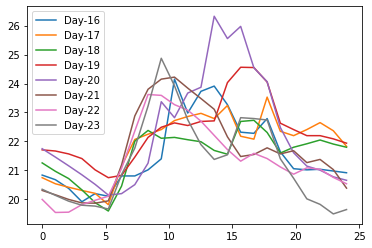

In [130]:
days = list(set(time_temp_data[:,0]))
time_temp = {}
x_axis = np.linspace(0,24,24)


# np.linspace(np.average(time_temp_data[time_temp_data[:,0]==day][:,2]),np.average(time_temp_data[time_temp_data[:,0]==day][:,2]),24)
# day = 16
for day in days:
    time_temp[day] = time_temp_data[time_temp_data[:,0]==day]
    lbl = 'Day-'+ str(day)
    plt.plot(x_axis, time_temp[day][:,2], label=lbl)
    plt.legend()
plt.show()

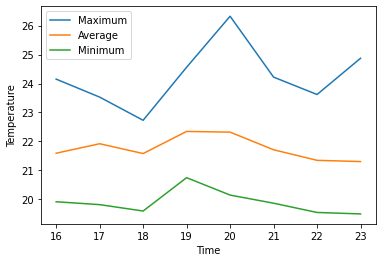

In [129]:
avg_day = []
max_day = []
min_day = []

y_avg = []
for day in days:
    max_day.append(np.max(np.array(time_temp_data[time_temp_data[:,0]==day][:,2], dtype='float64')))
    min_day.append(np.min(np.array(time_temp_data[time_temp_data[:,0]==day][:,2], dtype='float64')))
    avg_day.append(np.average(np.array(time_temp_data[time_temp_data[:,0]==day][:,2], dtype='float64')))
#     y_avg.append(np.ones((24,)) * avg_day)
plt.plot(days,max_day, label='Maximum')
plt.plot(days,avg_day, label='Average')
plt.plot(days,min_day, label='Minimum')
# plt.plot(days,(np.array(max_day)-np.array(min_day))/2+np.array(avg_day), label='difference')
# plt.plot(days,np.array(avg_day)-(np.array(max_day)-np.array(min_day))/2, label='difference1')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()